<a href="https://colab.research.google.com/github/data-better/DeepS/blob/master/10%EC%9E%A5_MNIST_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  MNIST 숫자 손글씨 분류

* Tensorflow 버전 검토

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, models
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPool2D
from tensorflow.keras.utils import plot_model
print(tf.__version__)

2.2.0-rc2


### MNIST 데이터를 읽고 그래프로 살펴보기

11493376/11490434 [==============================] - 0s 0us/step


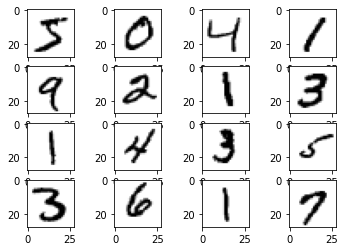

In [ ]:
mnist = datasets.mnist

(train_x, train_y), (test_x, test_y) = mnist.load_data()
train_x, test_x = train_x / 255.0, test_x / 255.0

import matplotlib.pyplot as plt
for col1 in range(16):
  plt.subplot(4,4,col1+1)
  plt.imshow(train_x[col1].reshape(28,28), cmap=plt.cm.binary)
plt.show()

### 데이터 확인

In [ ]:
digit =  train_x[0]
print(type(digit))

print("digit :", digit.shape)
print("train images :", train_x.shape)
print("test  images :", test_x.shape)

<class 'numpy.ndarray'>
digit : (28, 28)
train images : (60000, 28, 28)
test  images : (10000, 28, 28)


### 완전연결 신경망의 작성

In [ ]:
model1 = models.Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(512, activation='relu'),
  Dense(10, activation='softmax')
])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


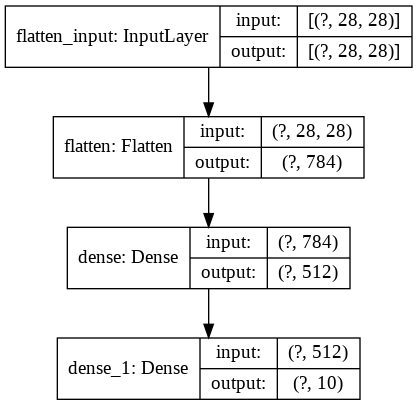

In [ ]:
plot_model(model1, to_file="model1_mnist.png", show_shapes=True)

In [ ]:
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model1.fit(train_x, train_y, epochs=12, batch_size=256, validation_split=0.25)
#hist = model1.fit(train_x, train_y, epochs=12, batch_size=256, validation_data=(test_x, test_y))

Epoch 1/12
176/176 [==============================] - 1s 4ms/step - loss: 0.3765 - accuracy: 0.8967 - val_loss: 0.2024 - val_accuracy: 0.9435
Epoch 2/12
176/176 [==============================] - 1s 3ms/step - loss: 0.1632 - accuracy: 0.9537 - val_loss: 0.1499 - val_accuracy: 0.9571
Epoch 3/12
176/176 [==============================] - 1s 3ms/step - loss: 0.1092 - accuracy: 0.9689 - val_loss: 0.1327 - val_accuracy: 0.9609
Epoch 4/12
176/176 [==============================] - 1s 3ms/step - loss: 0.0805 - accuracy: 0.9769 - val_loss: 0.1067 - val_accuracy: 0.9684
Epoch 5/12
176/176 [==============================] - 1s 3ms/step - loss: 0.0607 - accuracy: 0.9835 - val_loss: 0.0958 - val_accuracy: 0.9718
Epoch 6/12
176/176 [==============================] - 1s 3ms/step - loss: 0.0475 - accuracy: 0.9873 - val_loss: 0.0922 - val_accuracy: 0.9729
Epoch 7/12
176/176 [==============================] - 1s 3ms/step - loss: 0.0368 - accuracy: 0.9907 - val_loss: 0.0837 - val_accuracy: 0.9760
Epoch 

In [ ]:
sc = model1.evaluate(test_x, test_y)
print("accuracy : ", sc[1], "  loss : ", sc[0])

313/313 [==============================] - 1s 2ms/step - loss: 0.0662 - accuracy: 0.9802
accuracy :  0.9801999926567078   loss :  0.06617751717567444


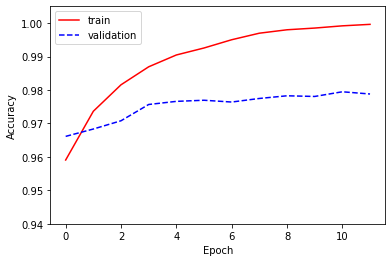

In [ ]:
plt.plot(hist.history['accuracy'], 'r-')
plt.plot(hist.history['val_accuracy'], 'b--')
plt.legend(['train', 'validation'], loc='upper left')
plt.ylim([0.94,1.005])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

### 합성곱 신경망 

In [ ]:
train_x = train_x.reshape(-1,28,28,1)
test_x  = test_x.reshape(-1,28,28,1)
print(train_x.shape, test_x.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)              

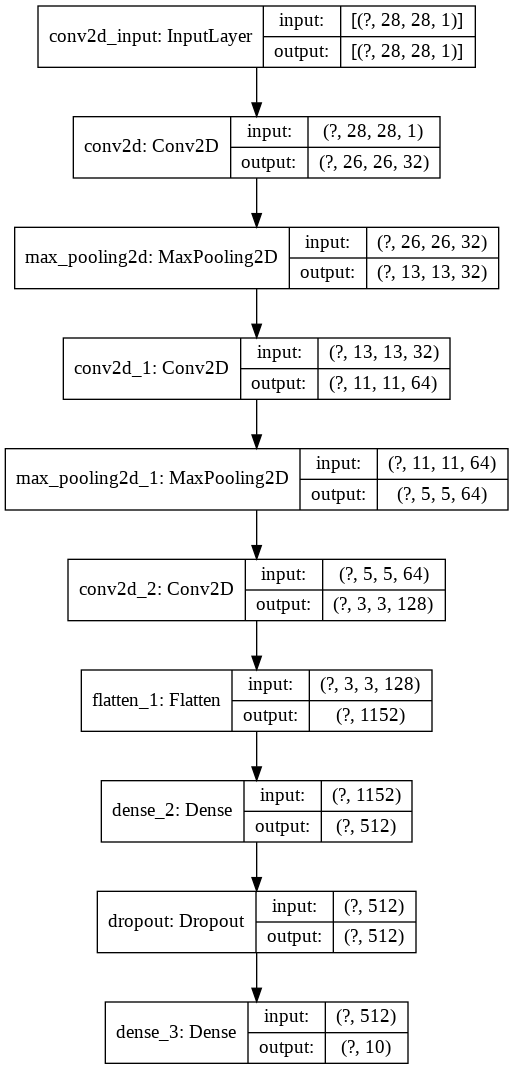

In [ ]:
model2 = models.Sequential([
  Conv2D(input_shape=(28,28,1), kernel_size=(3,3), 
         filters=32, activation='relu'),
  MaxPool2D(),
  Conv2D(kernel_size=(3,3), filters=64, activation='relu'),
  MaxPool2D(),
  Conv2D(kernel_size=(3,3), filters=128, activation='relu'),
  Flatten(),
  Dense(512, activation='relu'),
  Dropout(0.2),
  Dense(10, activation='softmax')
])
model2.summary()
plot_model(model2, to_file="model2_mnist.png", show_shapes=True)

In [ ]:
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist2 = model2.fit(train_x, train_y, epochs=12, batch_size=512, validation_split=0.25)

Epoch 1/12
88/88 [==============================] - 1s 13ms/step - loss: 0.4522 - accuracy: 0.8642 - val_loss: 0.1257 - val_accuracy: 0.9630
Epoch 2/12
88/88 [==============================] - 1s 10ms/step - loss: 0.0922 - accuracy: 0.9714 - val_loss: 0.0799 - val_accuracy: 0.9751
Epoch 3/12
88/88 [==============================] - 1s 10ms/step - loss: 0.0592 - accuracy: 0.9818 - val_loss: 0.0721 - val_accuracy: 0.9774
Epoch 4/12
88/88 [==============================] - 1s 11ms/step - loss: 0.0438 - accuracy: 0.9857 - val_loss: 0.0483 - val_accuracy: 0.9859
Epoch 5/12
88/88 [==============================] - 1s 10ms/step - loss: 0.0342 - accuracy: 0.9893 - val_loss: 0.0496 - val_accuracy: 0.9849
Epoch 6/12
88/88 [==============================] - 1s 10ms/step - loss: 0.0279 - accuracy: 0.9910 - val_loss: 0.0460 - val_accuracy: 0.9873
Epoch 7/12
88/88 [==============================] - 1s 10ms/step - loss: 0.0233 - accuracy: 0.9924 - val_loss: 0.0526 - val_accuracy: 0.9849
Epoch 8/12
88

In [ ]:
sc2 = model2.evaluate(test_x, test_y)
print("accuracy : ", sc2[1], "  loss : ", sc2[0])

313/313 [==============================] - 1s 2ms/step - loss: 0.0311 - accuracy: 0.9901
accuracy :  0.9901000261306763   loss :  0.031135449185967445


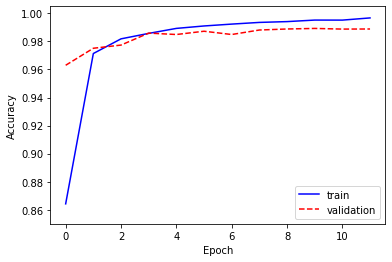

In [ ]:
plt.plot(hist2.history['accuracy'], 'b-')
plt.plot(hist2.history['val_accuracy'], 'r--')
plt.legend(['train', 'validation'], loc='lower right')
plt.ylim([0.85,1.005])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()